In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate

import pandas as pd
from tqdm.notebook import tqdm

In [482]:
seed =11
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
dt = 0.1
t = np.arange(0,5000,dt)
# K = 5.3
K = 6
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

Text(0.5, 1.0, '$K=6,m=6,N=5000$')

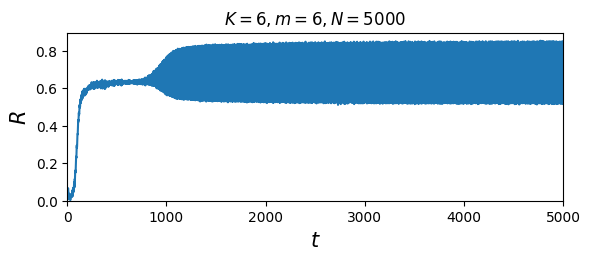

In [483]:
plt.subplot(211)
plt.plot(t,rs)
plt.xlabel(r'$t$',fontsize=15)
plt.ylabel(r'$R$',fontsize=15)
plt.xlim(0,5000)
plt.ylim(0,)
plt.title(rf'$K={K},m={m},N={N}$')

In [507]:
s_lang = 1000

In [508]:
avg_dtheta = (theta[s_lang:] - theta[0:-s_lang])/(t[s_lang]-t[0])

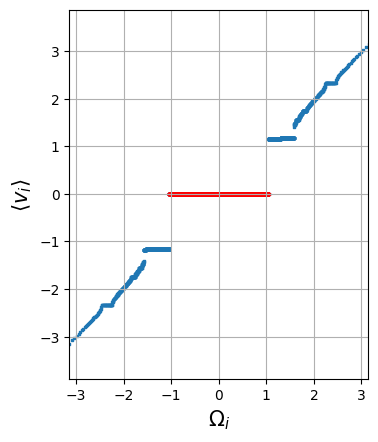

In [509]:
v_t = avg_dtheta[-1]
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))
plt.scatter(omega,v_t,marker='s',s=0.8)
plt.scatter(omega[c_0],v_t[c_0],marker='s',color='r',s=1)
plt.xlabel(r'$\Omega_i$',fontsize=15)
plt.ylabel(r'$\langle v_i \rangle$',fontsize=15)
plt.xlim(-np.pi,np.pi)
plt.gca().set_aspect('equal')
plt.grid()
# plt.ylim(-0.1,0.1)
# plt.title(rf'$K={K},m={m},N={N}$')

In [510]:
r0 = np.abs(np.mean(np.exp(1j*theta[:,c_0]),axis=1) * len(c_0)/N)
rp_ = np.abs(np.mean(np.exp(1j*theta[:,c_p]),axis=1) * len(c_p)/N)
rm_ = np.abs(np.mean(np.exp(1j*theta[:,c_m]),axis=1) * len(c_m)/N)

In [511]:
r_s = np.array([np.mean(rs[i:s_lang+i]) for i in range(len(rs)-s_lang)])

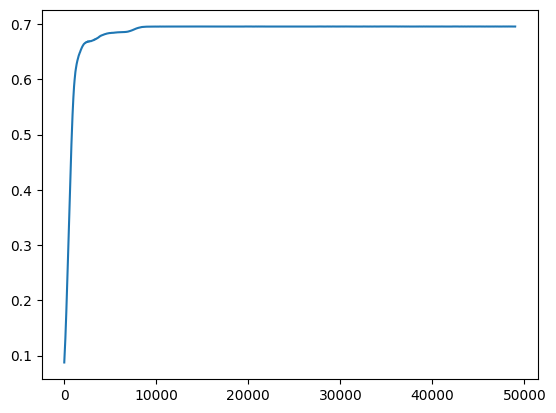

In [512]:
r0_s = np.array([np.mean(r0[i:s_lang+i]) for i in range(len(r0)-s_lang)])
rp_s = np.array([np.mean(rp_[i:s_lang+i]) for i in range(len(rp_)-s_lang)])
rm_s = np.array([np.mean(rm_[i:s_lang+i]) for i in range(len(rm_)-s_lang)])

plt.plot(np.abs(r0_s))

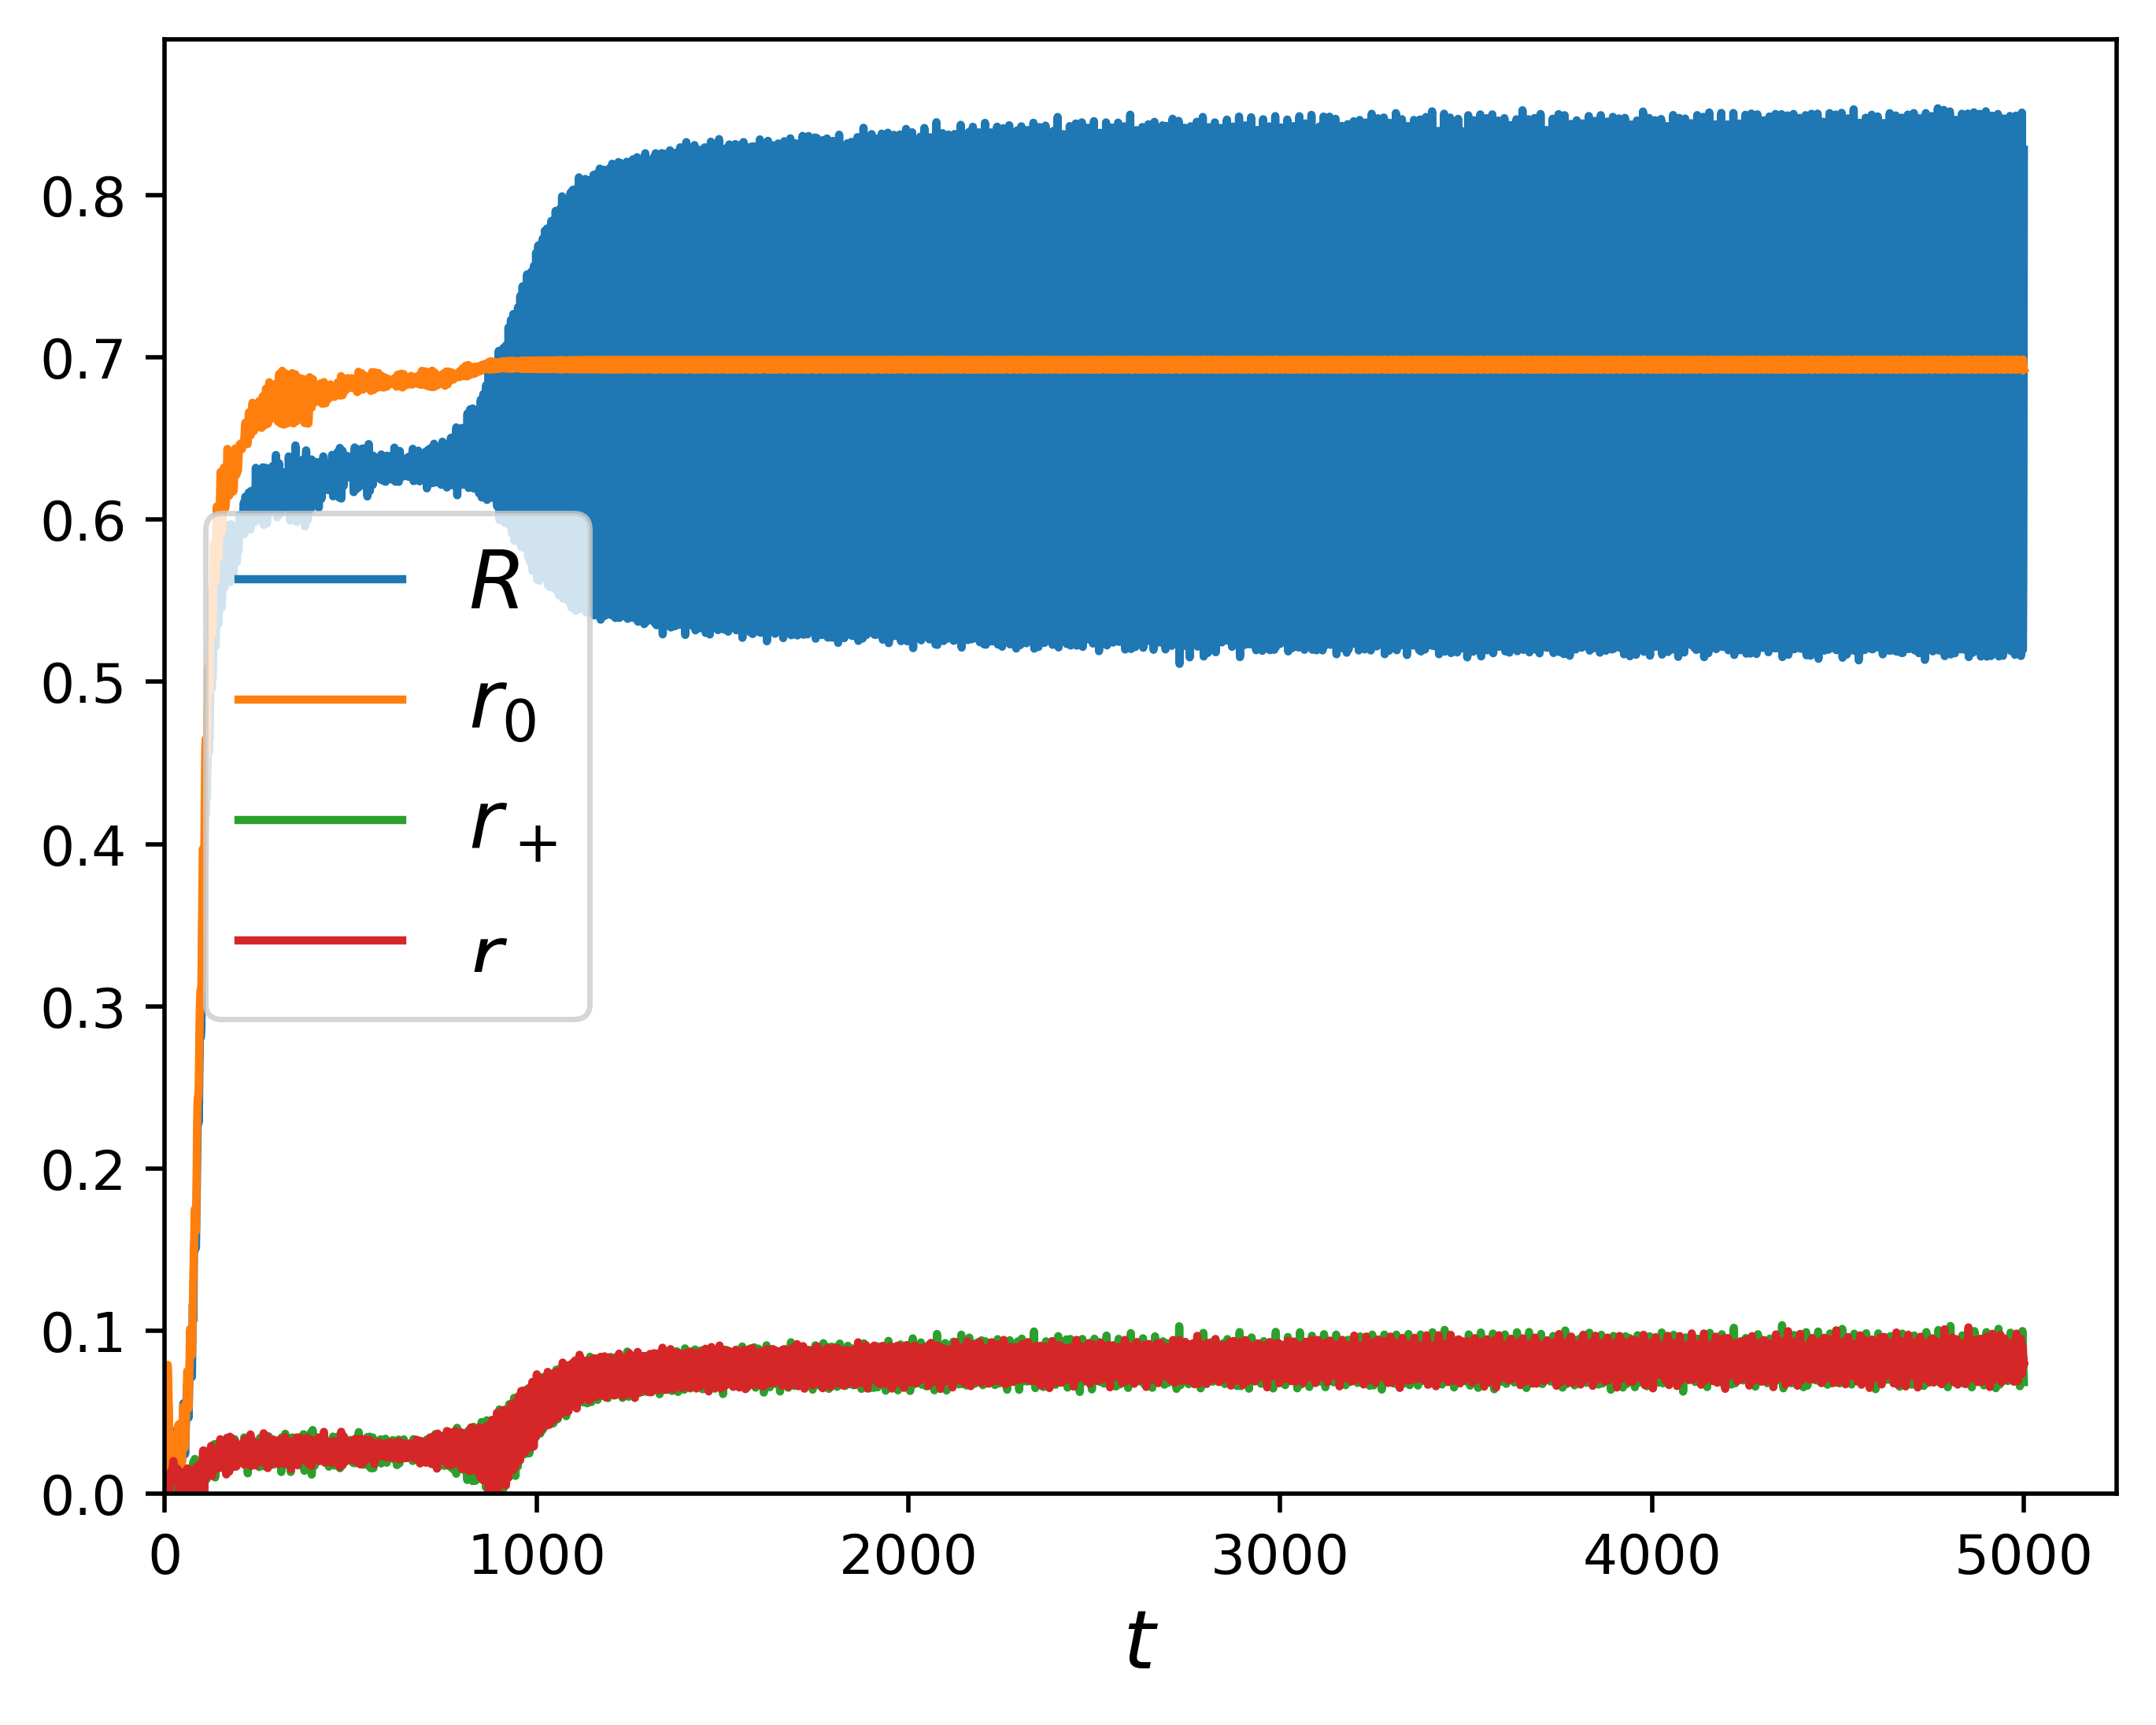

In [513]:
plt.figure(dpi = 500)
plt.plot(t[:],np.abs(rs),label=r'$R$')
plt.plot(t[:],np.abs(r0),label=r'$r_0$')
plt.plot(t[:],np.abs(rp_),label=r'$r_+$')
plt.plot(t[:],np.abs(rm_),label=r'$r_-$')
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
plt.xlim(0,)
plt.legend(fontsize=15)
# plt.grid()
# plt.title(rf'$K={K},m={m},N={N}$')


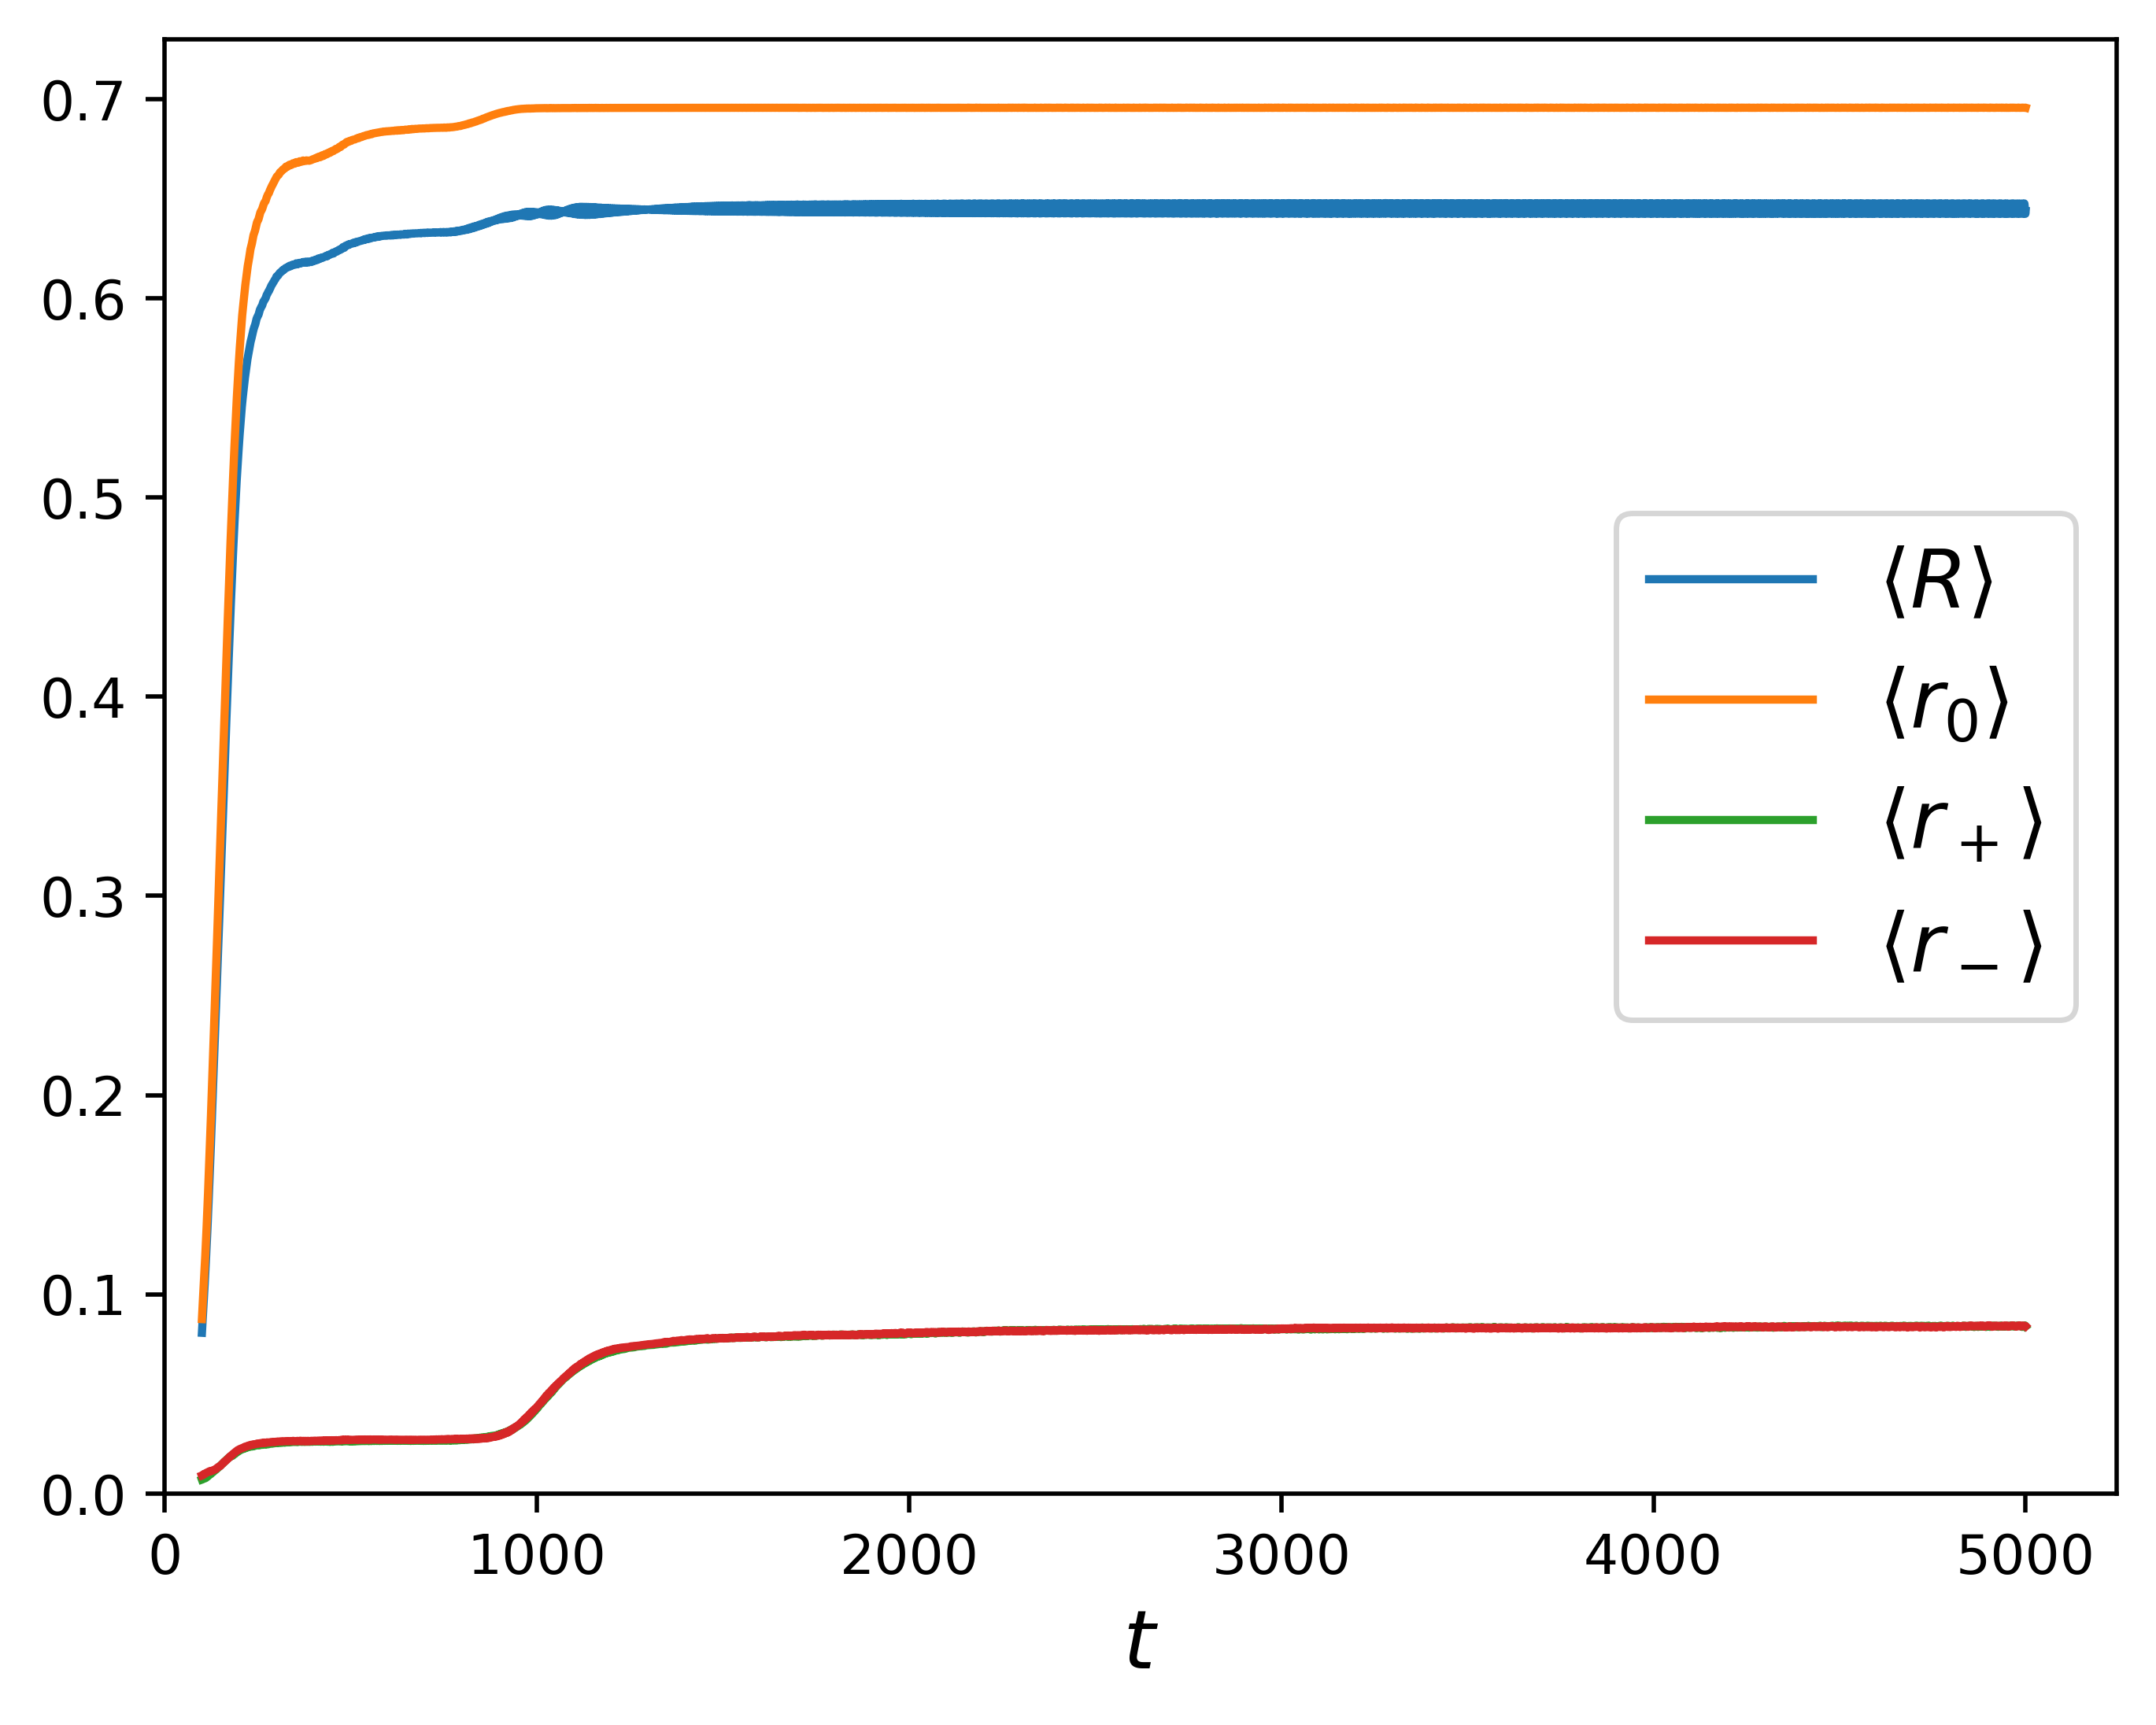

In [514]:
plt.figure(dpi = 500)
plt.plot(t[s_lang:],np.abs(r_s),label=r'$\langle R \rangle $')
plt.plot(t[s_lang:],np.abs(r0_s),label=r'$\langle r_0 \rangle$')
plt.plot(t[s_lang:],np.abs(rp_s),label=r'$\langle r_+ \rangle$')
plt.plot(t[s_lang:],np.abs(rm_s),label=r'$\langle r_- \rangle$')
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
plt.xlim(0,)
plt.legend(fontsize=15)
# plt.grid()
# plt.title(rf'$K={K},m={m},N={N}$')


In [574]:
OPS = 4/np.pi * np.sqrt(K*r_s/m) - 0.3056/np.sqrt(K*r_s*m**3)
opp = 4/np.pi * np.sqrt(K*rp_s/m) - 0.3056/np.sqrt(K*rp_s*m**3)
dps =  1/2 *m*K*K*r0_s*rp_s/(m**2 * OPS**2 + 1) + K*K* rp_s*rp_s/(4*OPS*(1+4*OPS**2*m**2))

In [568]:
OPS = 4/np.pi * np.sqrt(K*r_s/m) - 0.3056/np.sqrt(K*r_s*m**3)
opp = 4/np.pi * np.sqrt(K*rp_/m) - 0.3056/np.sqrt(K*rp_*m**3)
dps =  1/2 *m*K*K*r0*rp_/(m**2 * OPS**2 + 1) + K*K* rp_*rp_/(4*OPS*(1+4*OPS**2*m**2))

ValueError: operands could not be broadcast together with shapes (50000,) (49000,) 

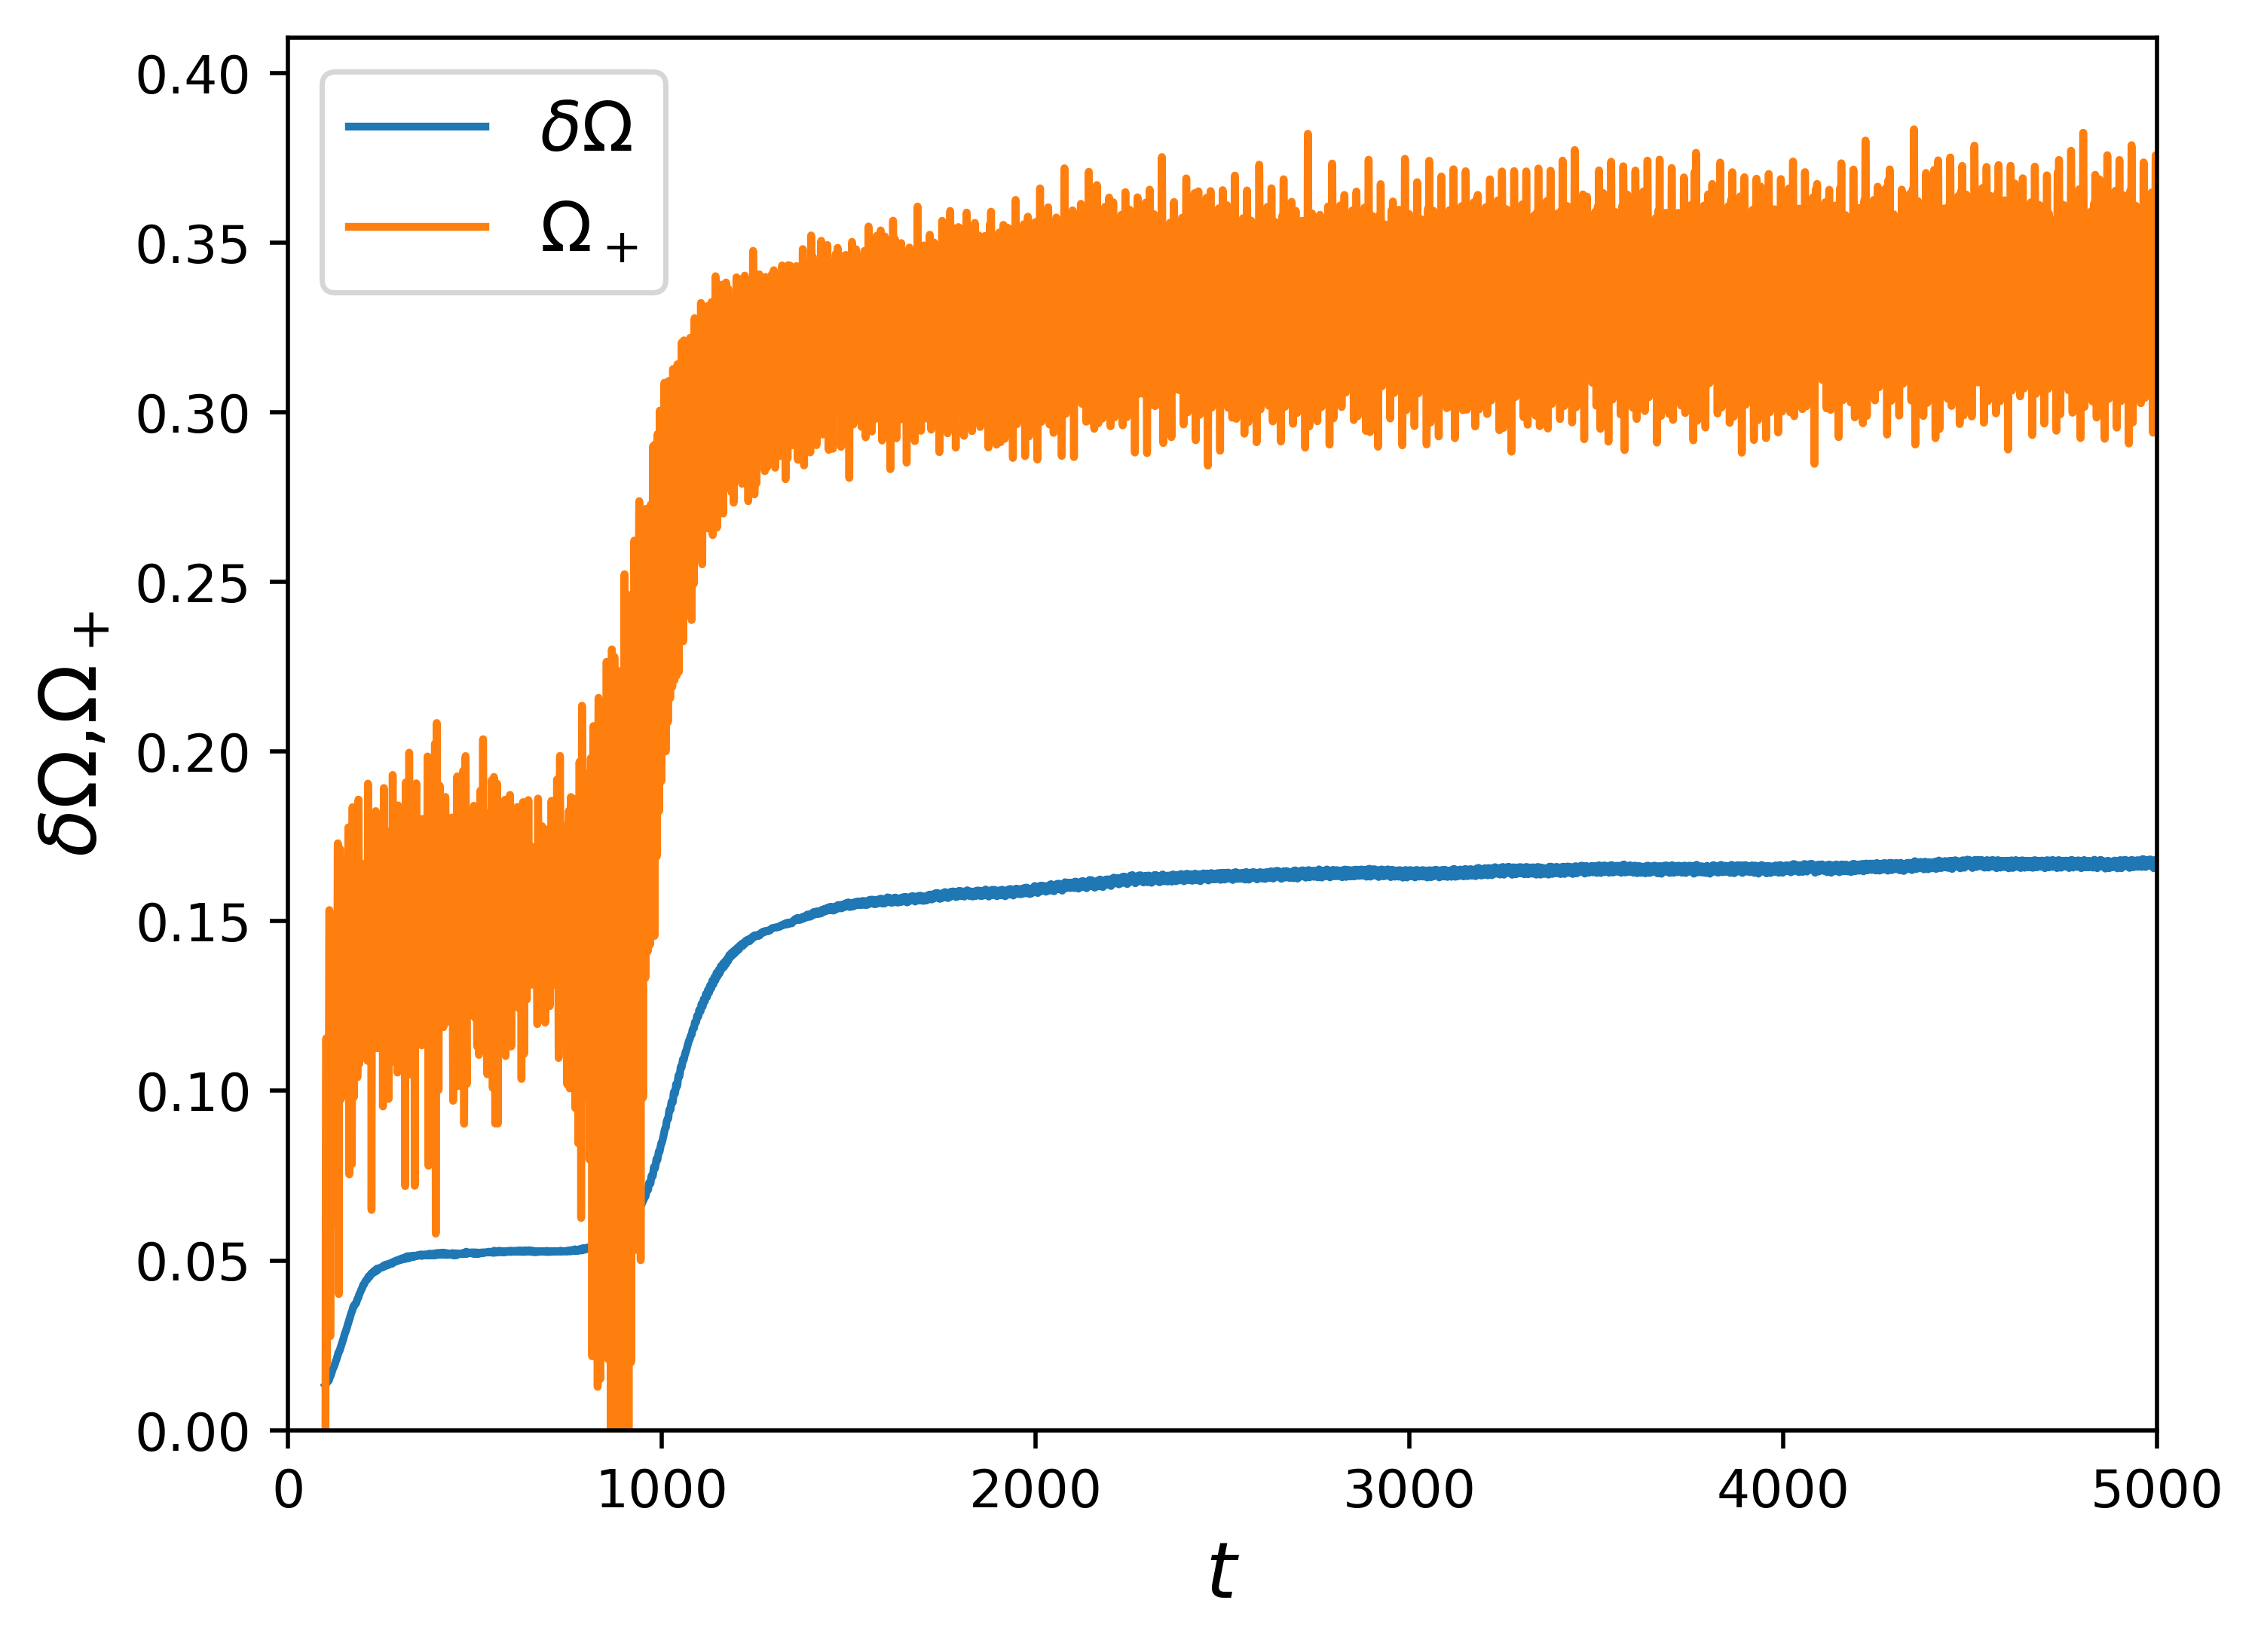

In [570]:
plt.figure(dpi = 500)
plt.plot(t[s_lang:],dps,label=r'$\delta\Omega$')
plt.plot(t[s_lang:],opp[s_lang:],label=r'$\Omega_+$')
plt.xlim(0,5000)
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
plt.ylabel(r'$\delta\Omega$,$\Omega_+$',fontsize=15)
plt.legend(fontsize=13)

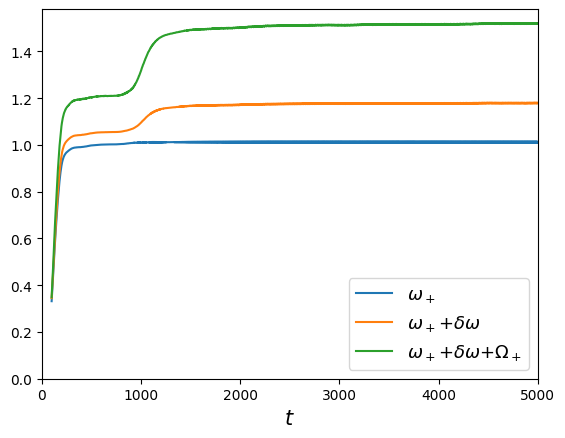

In [559]:
plt.plot(t[s_lang:],OPS,label=r'$\omega_+$')
plt.plot(t[s_lang:],OPS+dps,label=r'$\omega_+$+$\delta\omega$')
plt.plot(t[s_lang:],OPS+dps+opp,label=r'$\omega_+$+$\delta\omega$+$\Omega_+$')
plt.xlim(0,5000)
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
# plt.ylabel(r'$\delta\Omega$',fontsize=15)
plt.legend(fontsize=13)


In [560]:
o_p = np.where(omega > 0)[0]

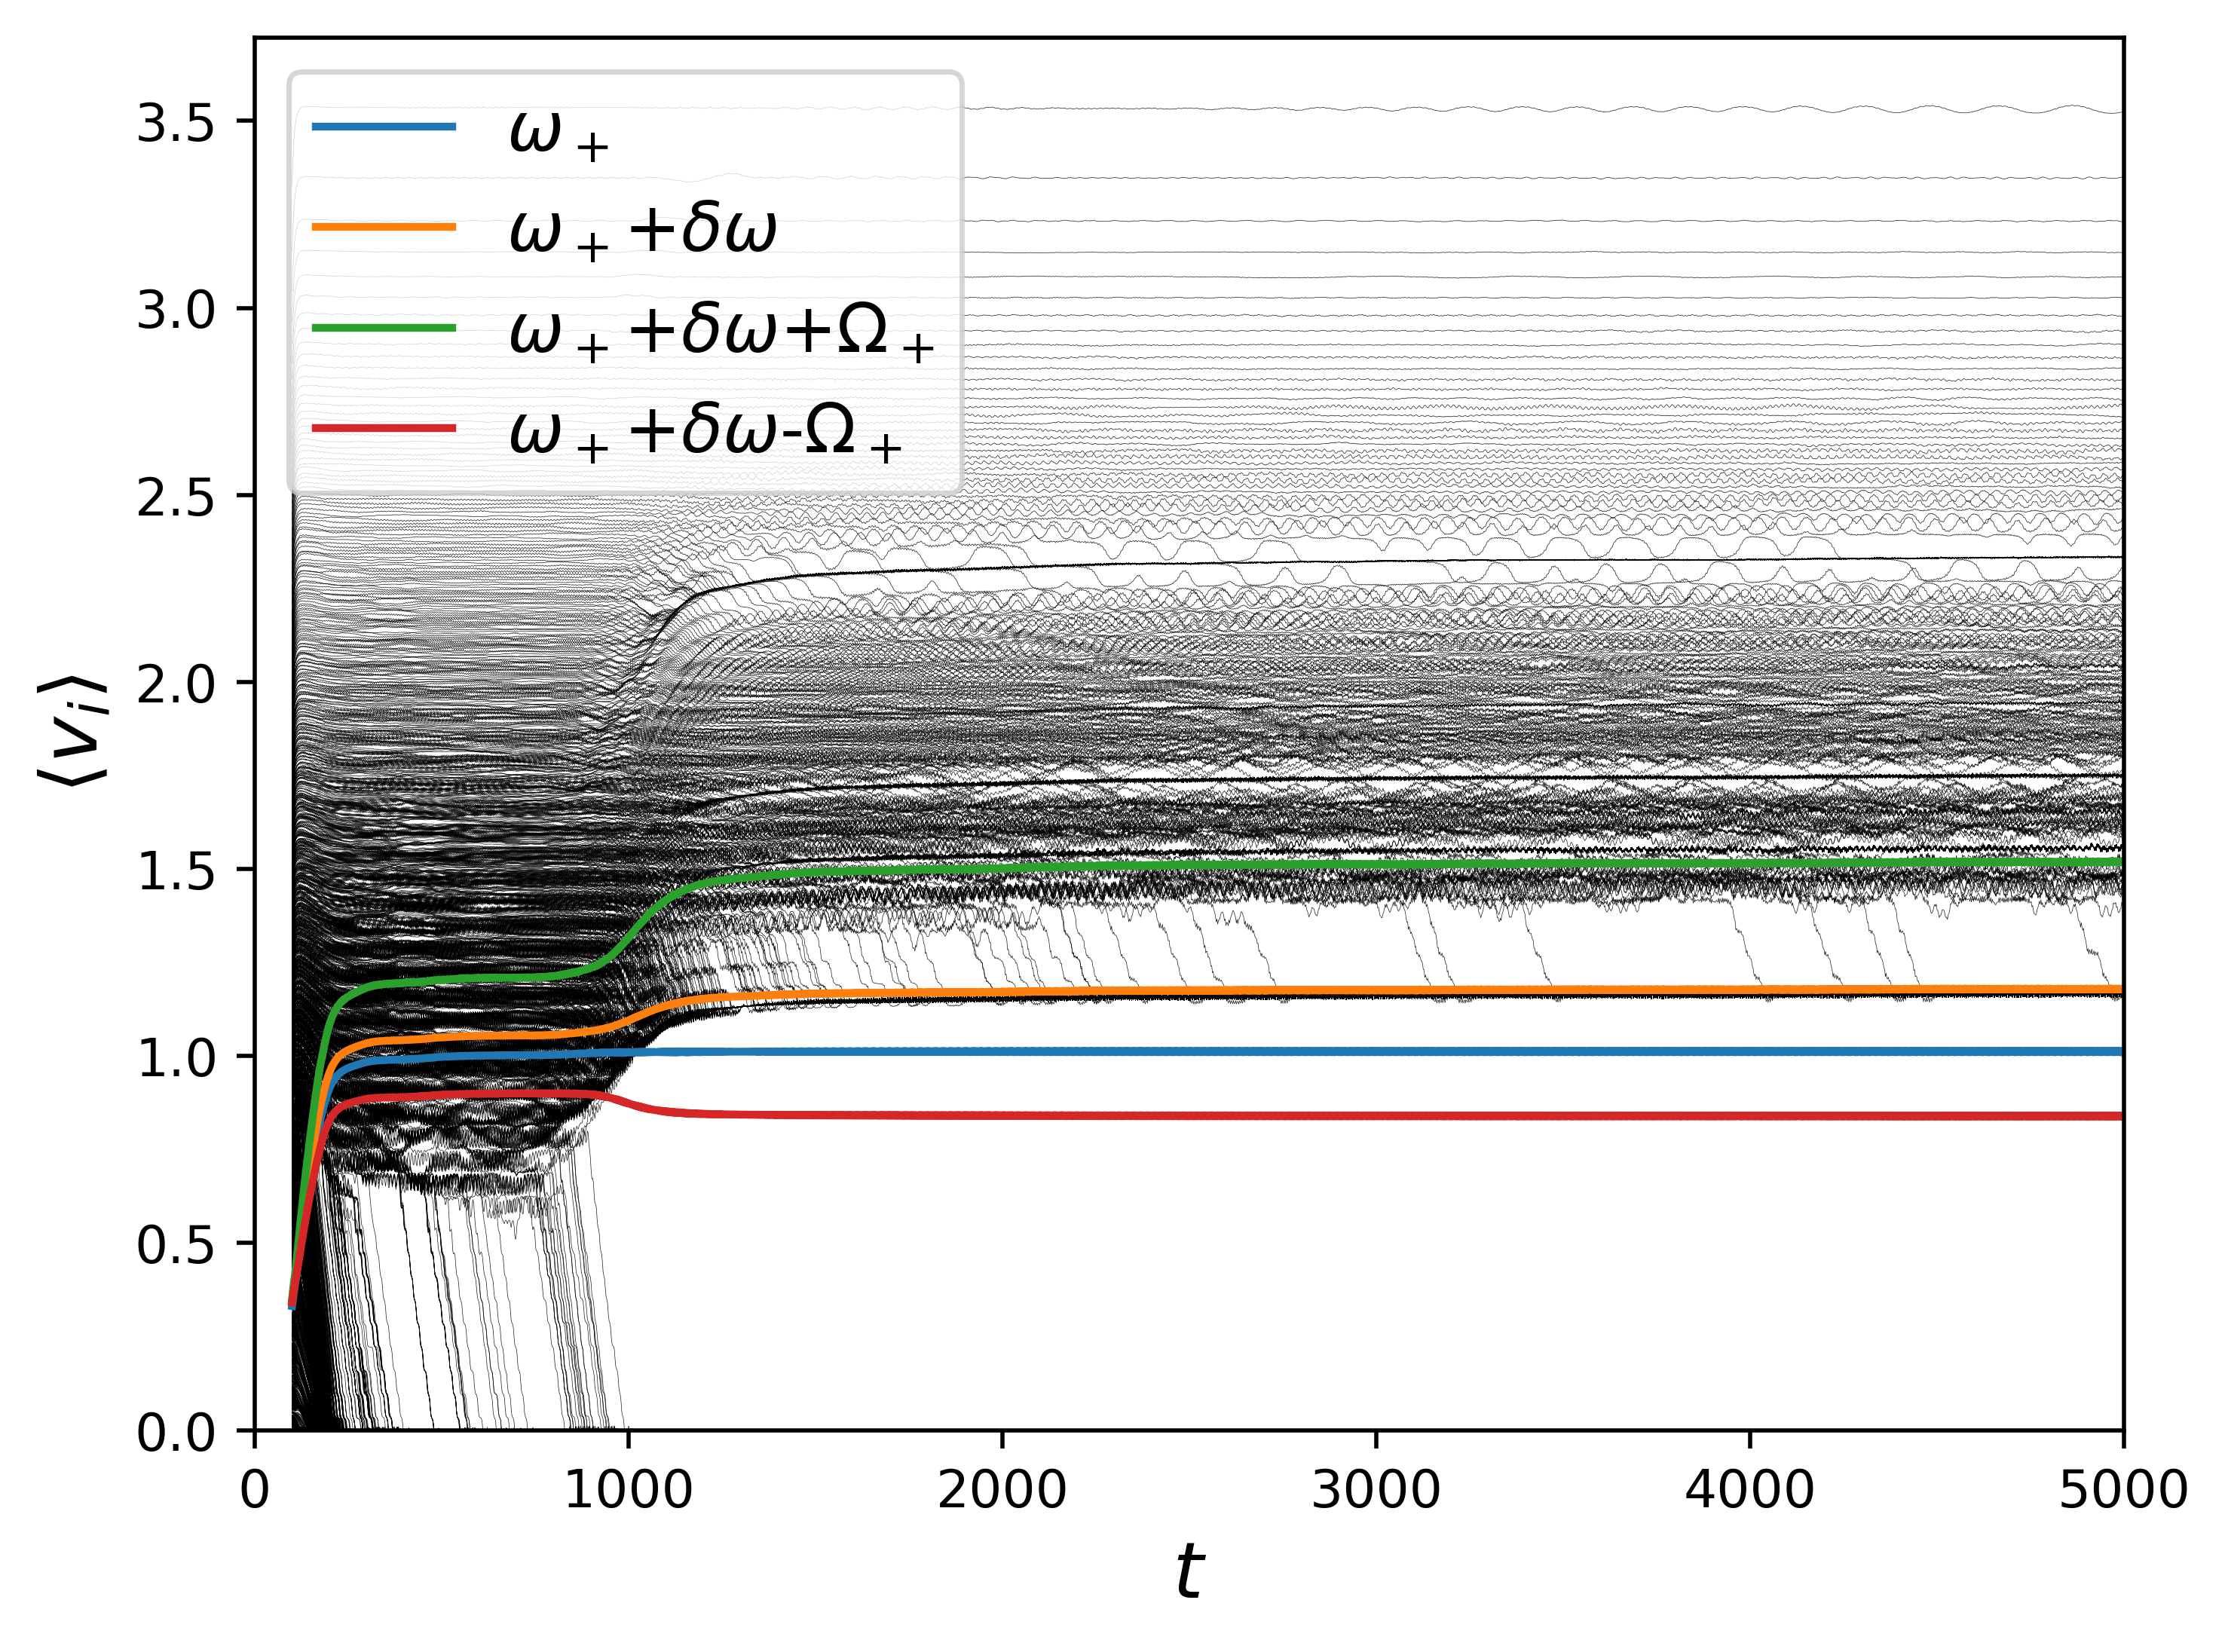

In [561]:
plt.figure(dpi = 500)
plt.plot(t[s_lang::20],avg_dtheta[::20,o_p],color='k',alpha=0.9,lw=0.1);

plt.plot(t[s_lang::20],OPS[::20],label=r'$\omega_+$')
plt.plot(t[s_lang::20],OPS[::20]+dps[::20],label=r'$\omega_+$+$\delta\omega$')
plt.plot(t[s_lang::20],OPS[::20]+dps[::20]+opp[::20],label=r'$\omega_+$+$\delta\omega$+$\Omega_+$')
plt.plot(t[s_lang::20],OPS[::20]+dps[::20]-opp[::20],label=r'$\omega_+$+$\delta\omega$-$\Omega_+$')
plt.xlim(0,5000)
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
# plt.ylabel(r'$\delta\Omega$',fontsize=15)
plt.legend(fontsize=13,loc='upper left')
plt.ylabel(r'$\langle v_i \rangle$',fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.show()

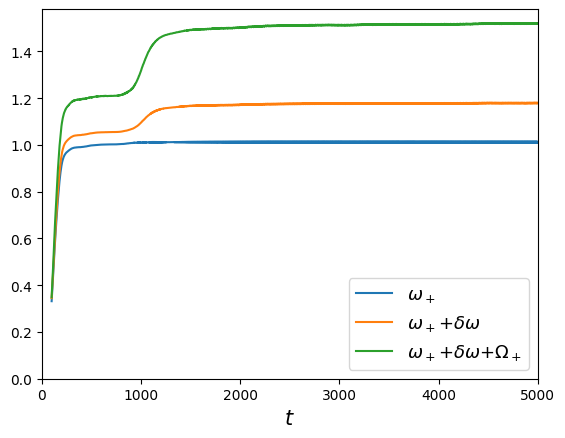

In [562]:
plt.plot(t[s_lang:],OPS,label=r'$\omega_+$')
plt.plot(t[s_lang:],OPS+dps,label=r'$\omega_+$+$\delta\omega$')
plt.plot(t[s_lang:],OPS+dps+opp,label=r'$\omega_+$+$\delta\omega$+$\Omega_+$')
plt.xlim(0,5000)
plt.xlabel(r'$t$',fontsize=15)
plt.ylim(0,)
# plt.ylabel(r'$\delta\Omega$',fontsize=15)
plt.legend(fontsize=13)


(-0.4, 0.4)

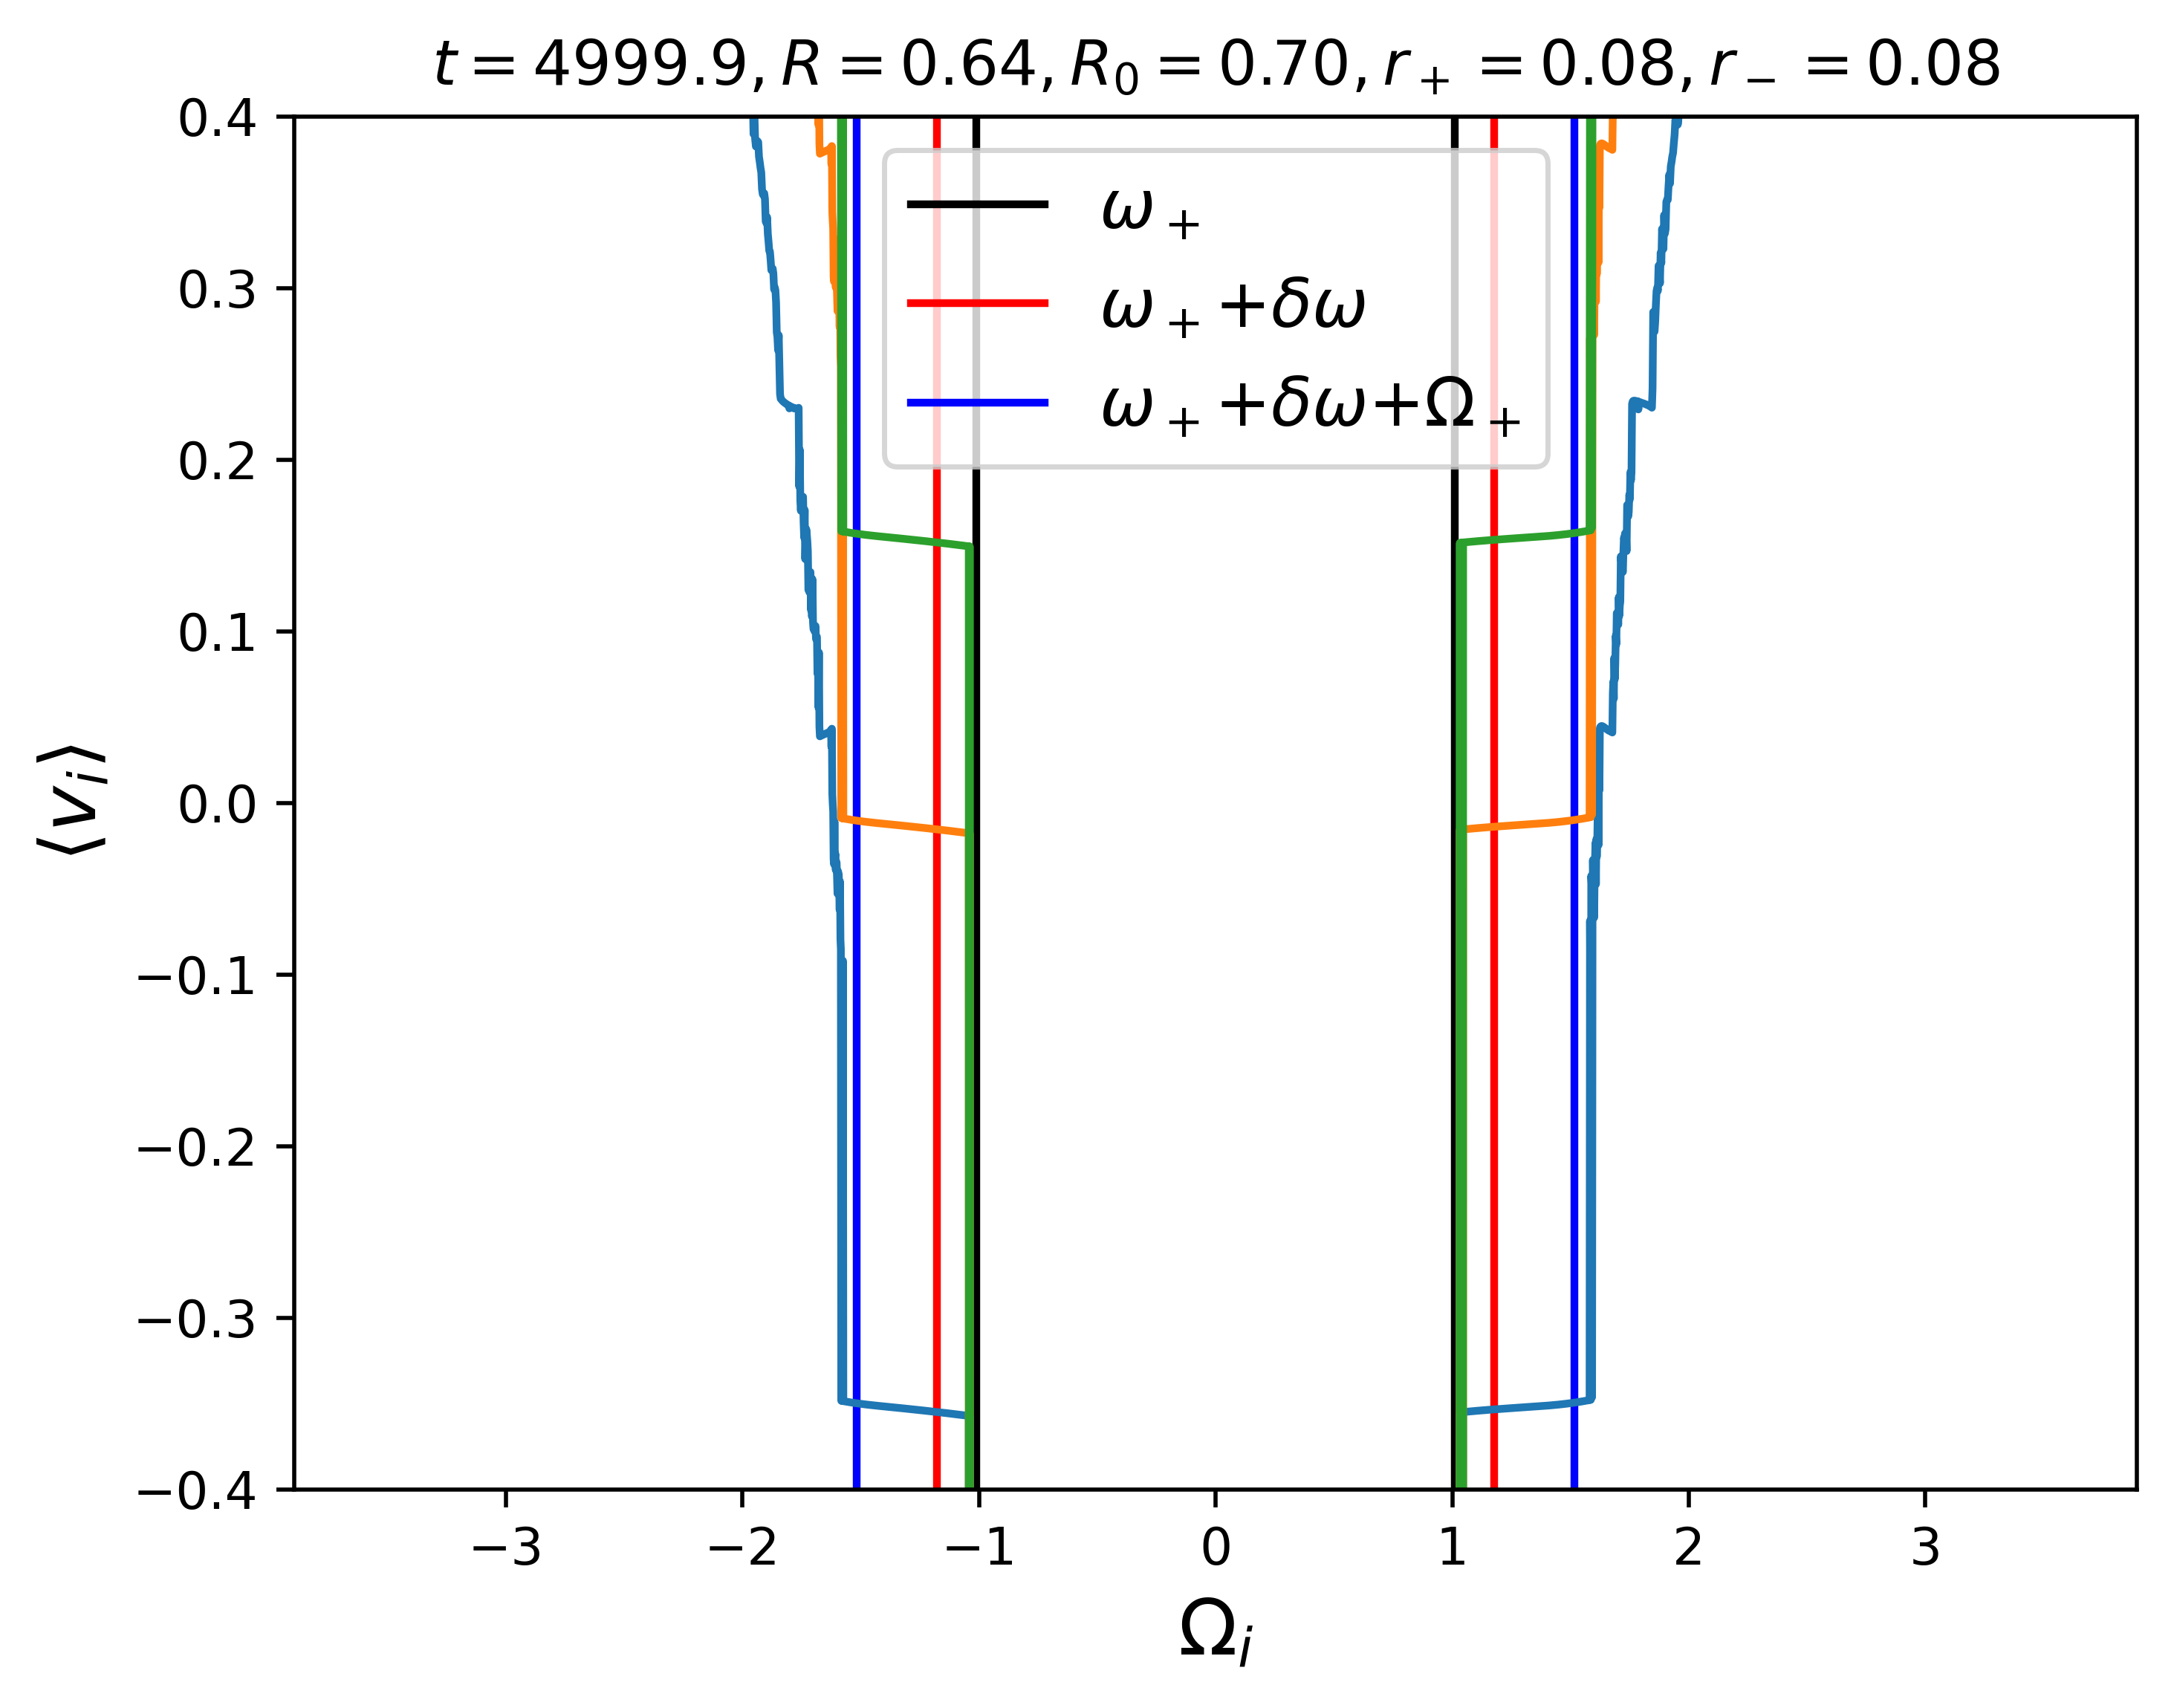

In [563]:
idx = -1
plt.figure(dpi = 500)
plt.title(rf'$t={t[idx]:.01f},R={r_s[idx]:.02f},R_0={r0_s[idx]:.02f},r_+={rp_s[idx]:.02f},r_-={rm_s[idx]:.02f}$')
plt.axvline(OPS[idx],color='k',label=r'$\omega_+$')
plt.axvline(-OPS[idx],color='k')
plt.axvline(OPS[idx]+dps[idx],color='r',label=r'$\omega_+$+$\delta\omega$')
plt.axvline(-(OPS[idx]+dps[idx]),color='r')

plt.axvline(OPS[idx]+dps[idx]+opp[idx],color='b',label=r'$\omega_+$+$\delta\omega$+$\Omega_+$')
plt.axvline(-(OPS[idx]+dps[idx]+opp[idx]),color='b')

plt.xlabel(r'$\Omega_i$',fontsize=15)
plt.ylabel(r'$\langle v_i \rangle$',fontsize=15)

plt.legend(fontsize=13)
plt.plot(omega,np.abs(avg_dtheta[idx])-(OPS[idx]+dps[idx]+opp[idx]))
plt.plot(omega,np.abs(avg_dtheta[idx])-(OPS[idx]+dps[idx]))
plt.plot(omega,np.abs(avg_dtheta[idx])-(OPS[idx]))
plt.ylim(-0.4,0.4)

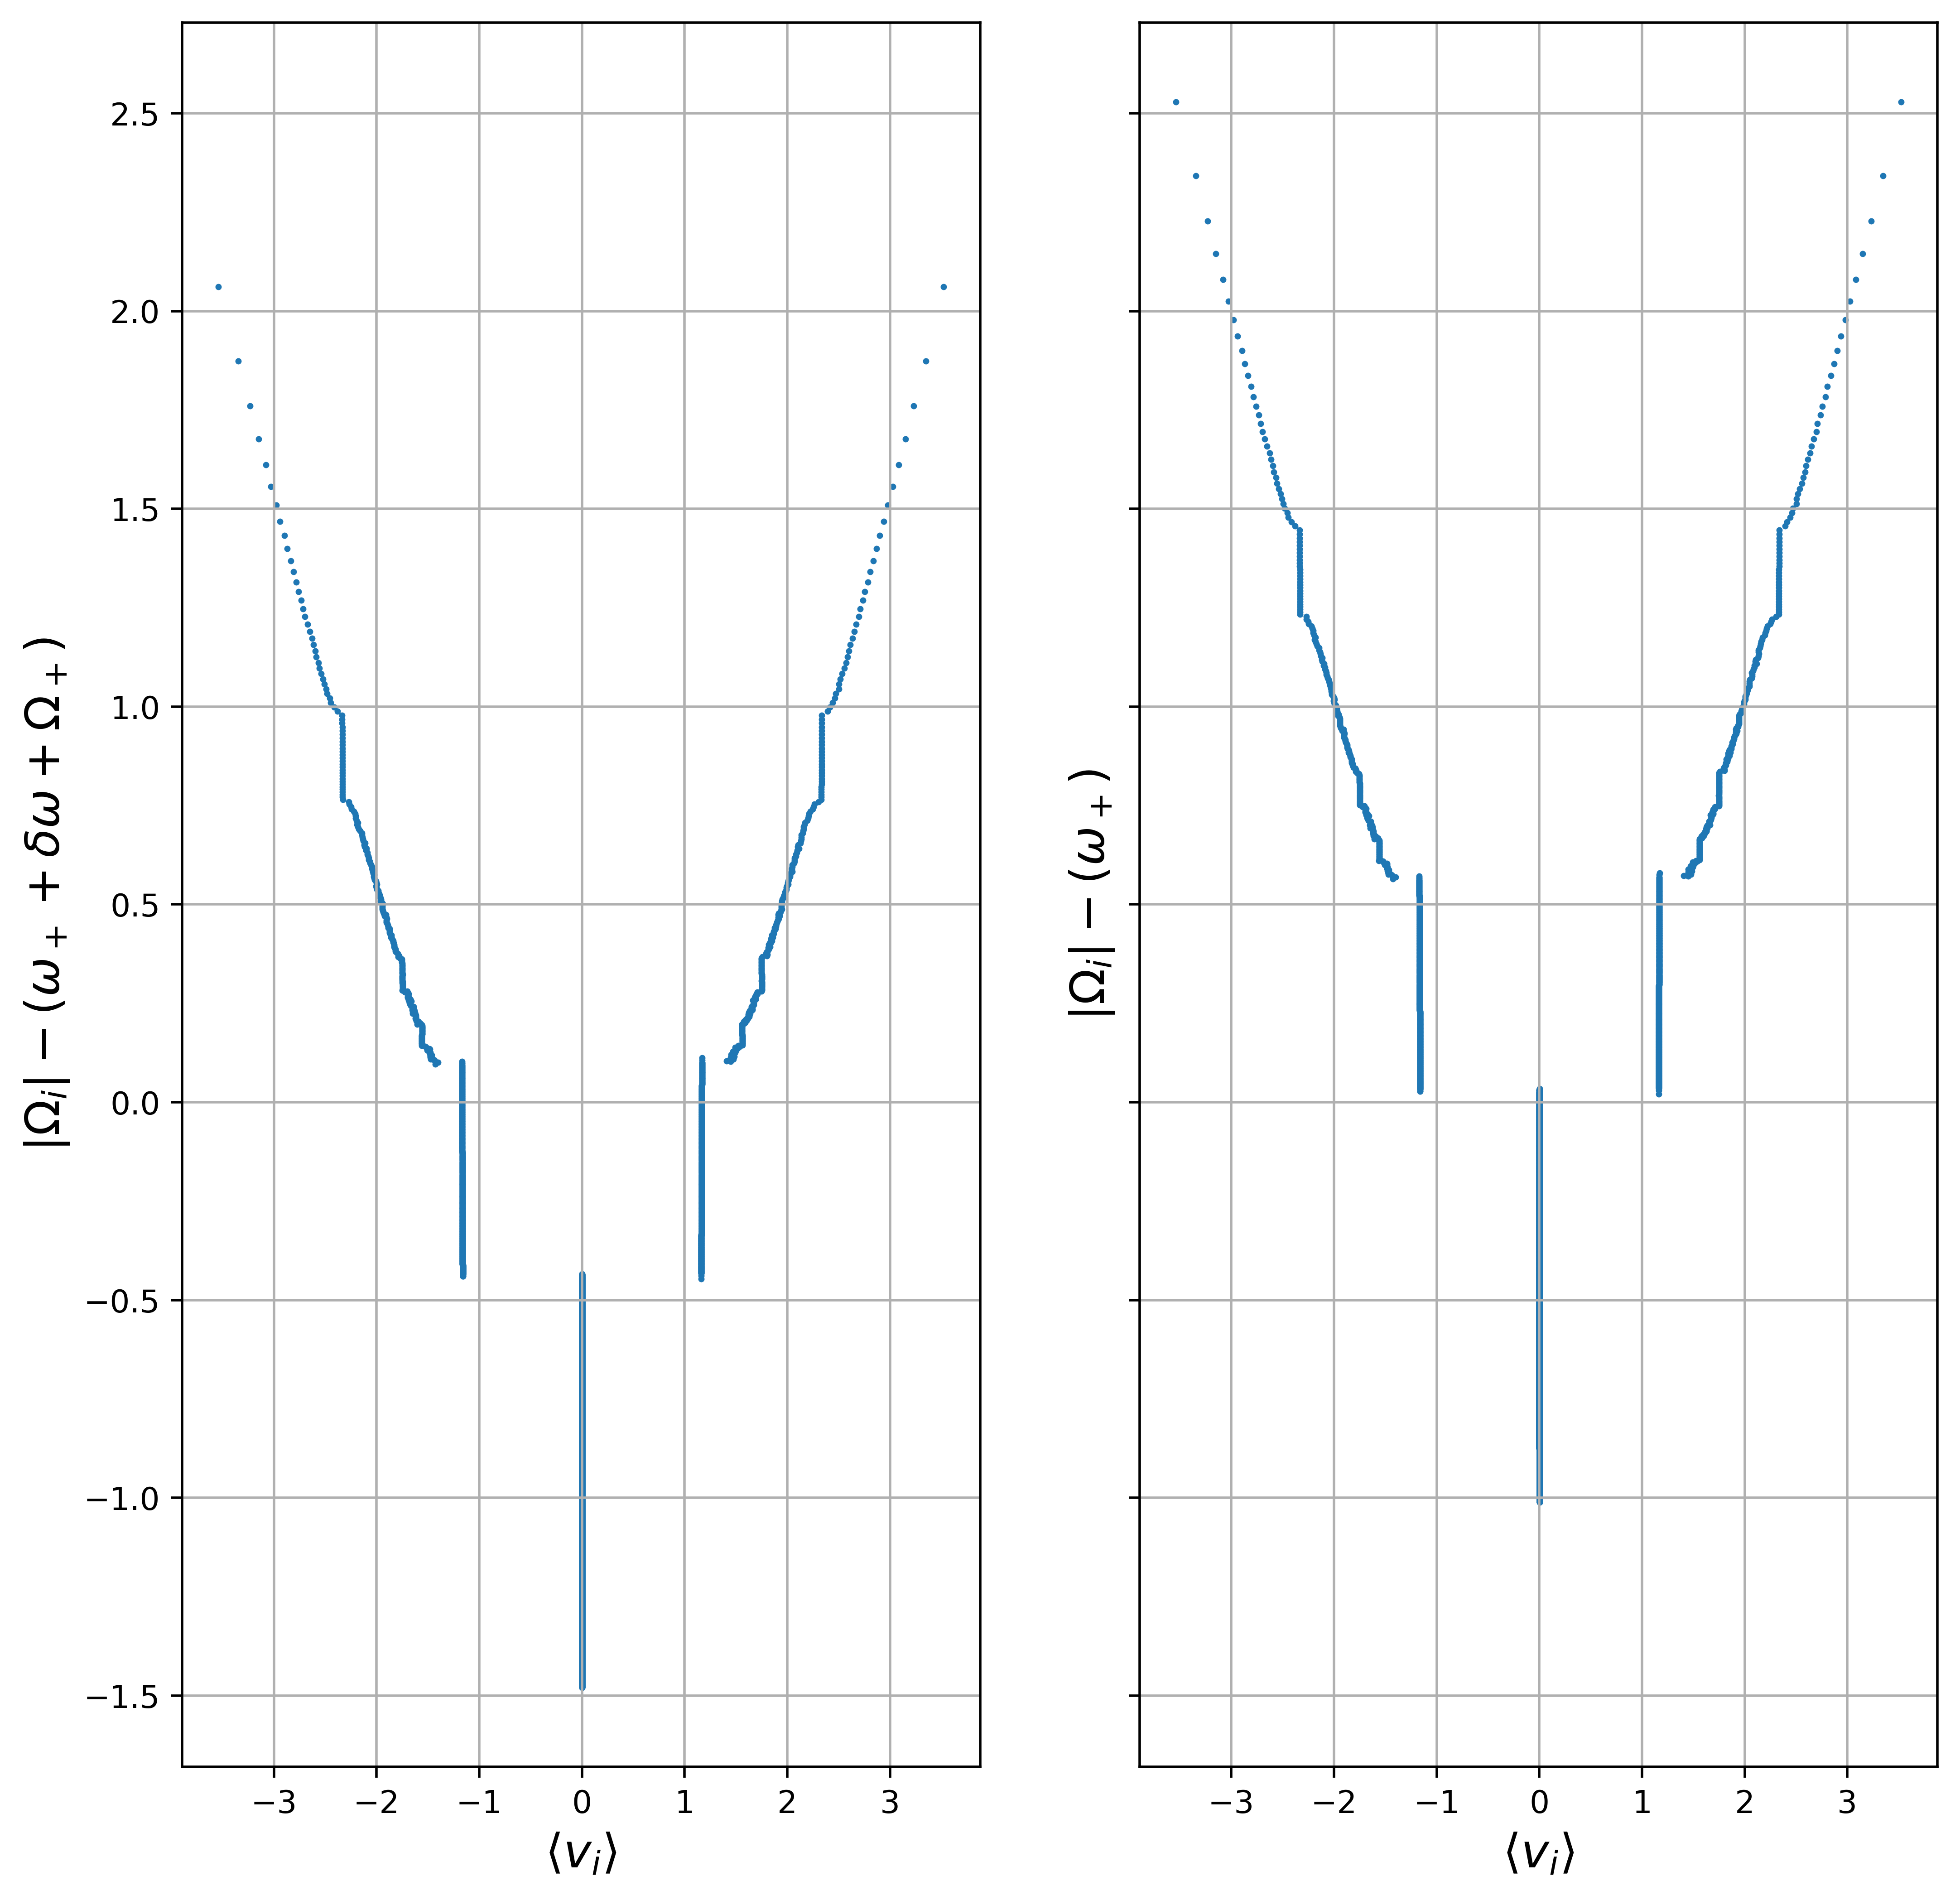

In [571]:
idx = -1
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10),dpi=500,sharey=True)
ax1.scatter(avg_dtheta[idx],np.abs(omega)-(OPS[idx]+dps[idx]+opp[idx]),s=1)
ax2.scatter(avg_dtheta[idx],np.abs(omega)-(OPS[idx]),s=1)



# plt.gca().set_aspect('equal')
# plt.ylim(-0.4,0.4)

ax1.set_xlabel(r'$\langle v_i \rangle$',fontsize=15)
ax2.set_xlabel(r'$\langle v_i \rangle$',fontsize=15)
ax1.set_ylabel(r'$|\Omega_i|-(\omega_++\delta\omega+\Omega_+)$',fontsize=15)
ax2.set_ylabel(r'$|\Omega_i|-(\omega_+)$',fontsize=15)
ax1.grid()
ax2.grid()

In [556]:
opp.shape

(50000,)

In [548]:
plt.plot(OPS+dps+opp)

ValueError: operands could not be broadcast together with shapes (49000,) (50000,) 

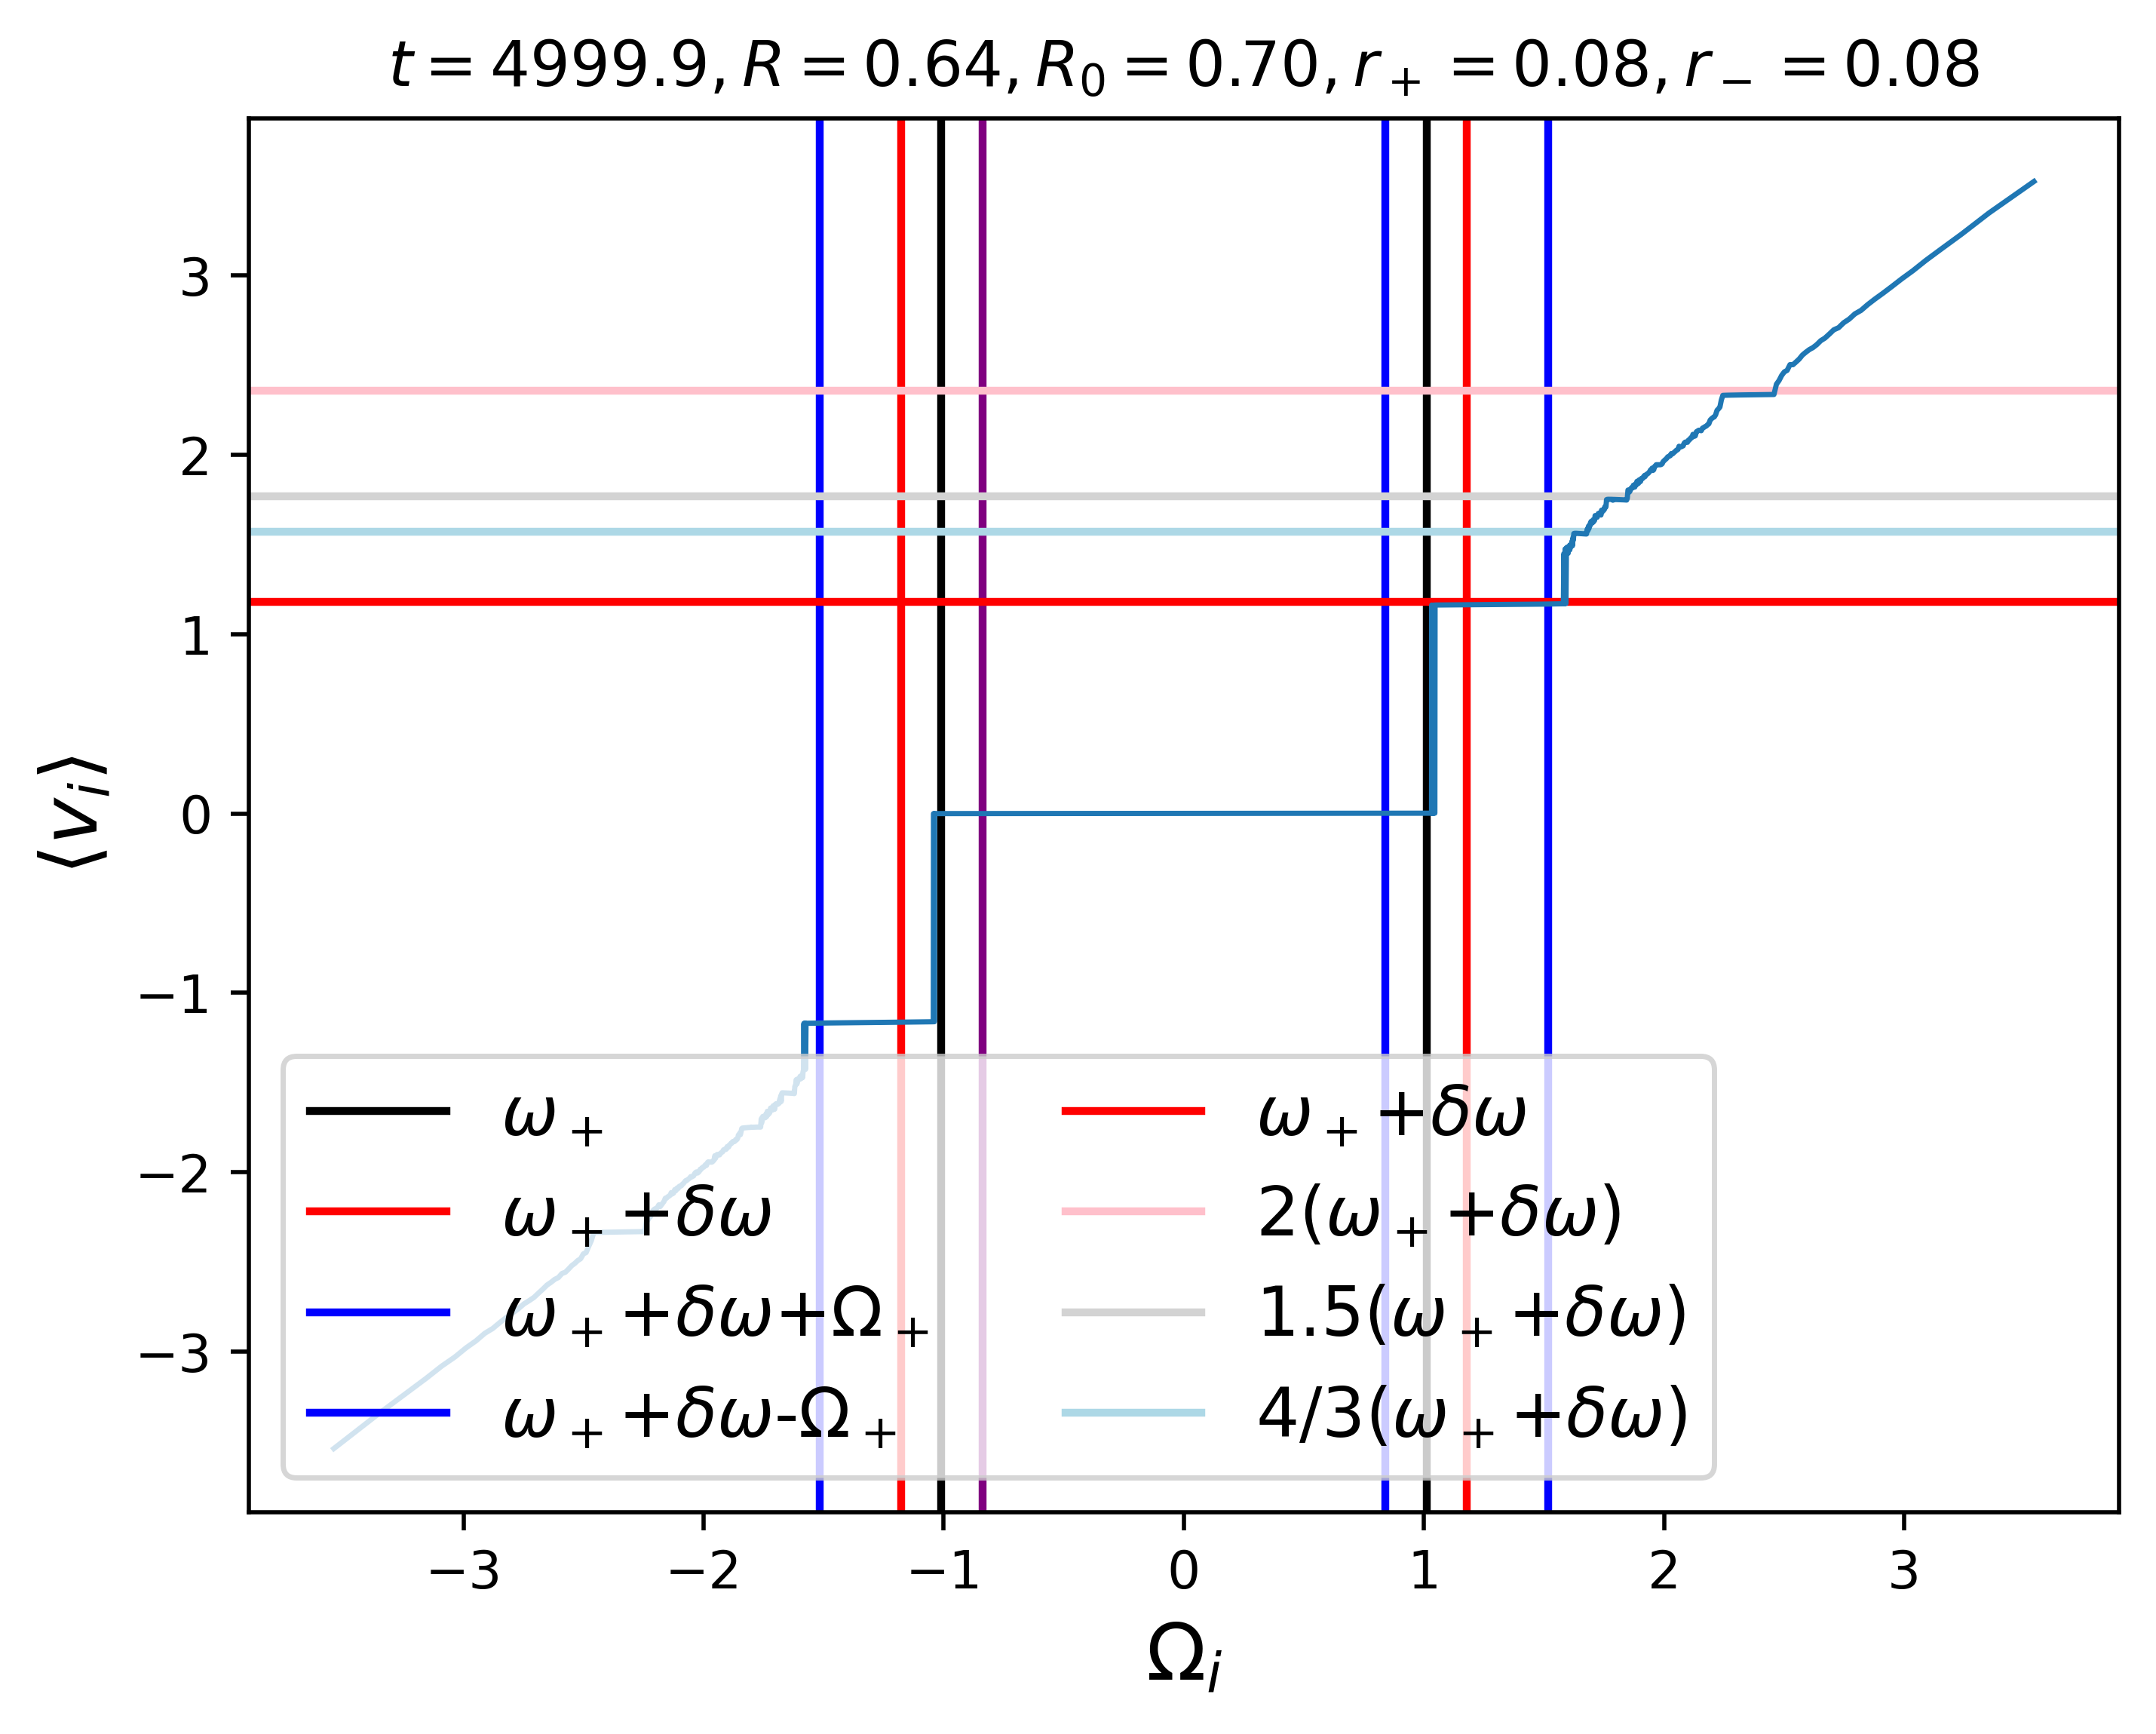

In [585]:
idx = -1
plt.figure(dpi = 500)
plt.title(rf'$t={t[idx]:.01f},R={r_s[idx]:.02f},R_0={r0_s[idx]:.02f},r_+={rp_s[idx]:.02f},r_-={rm_s[idx]:.02f}$')
plt.axvline(OPS[idx],color='k',label=r'$\omega_+$')
plt.axvline(-OPS[idx],color='k')
plt.axvline(OPS[idx]+dps[idx],color='r',label=r'$\omega_+$+$\delta\omega$')
plt.axvline(-(OPS[idx]+dps[idx]),color='r')

plt.axvline(OPS[idx]+dps[idx]+opp[idx],color='b',label=r'$\omega_+$+$\delta\omega$+$\Omega_+$')
plt.axvline(OPS[idx]+dps[idx]-opp[idx],color='b',label=r'$\omega_+$+$\delta\omega$-$\Omega_+$')

plt.axvline(-(OPS[idx]+dps[idx]+opp[idx]),color='b')
plt.axvline(-(OPS[idx]+dps[idx]-opp[idx]),color='purple')
plt.axhline(OPS[idx]+dps[idx],color='r',label=r'$\omega_+$+$\delta\omega$')
plt.axhline(2*(OPS[idx]+dps[idx]),color='pink',label=r'2$(\omega_+$+$\delta\omega)$')

plt.axhline(1.5*(OPS[idx]+dps[idx]),color='lightgrey',label=r'1.5$(\omega_+$+$\delta\omega)$')
plt.axhline(4/3*(OPS[idx]+dps[idx]),color='lightblue',label=r'4/3$(\omega_+$+$\delta\omega)$')
plt.xlabel(r'$\Omega_i$',fontsize=15)
plt.ylabel(r'$\langle v_i \rangle$',fontsize=15)
# plt.grid()
plt.legend(fontsize=13,ncol=2,loc='lower left')
plt.plot(omega,avg_dtheta[idx],lw=1)

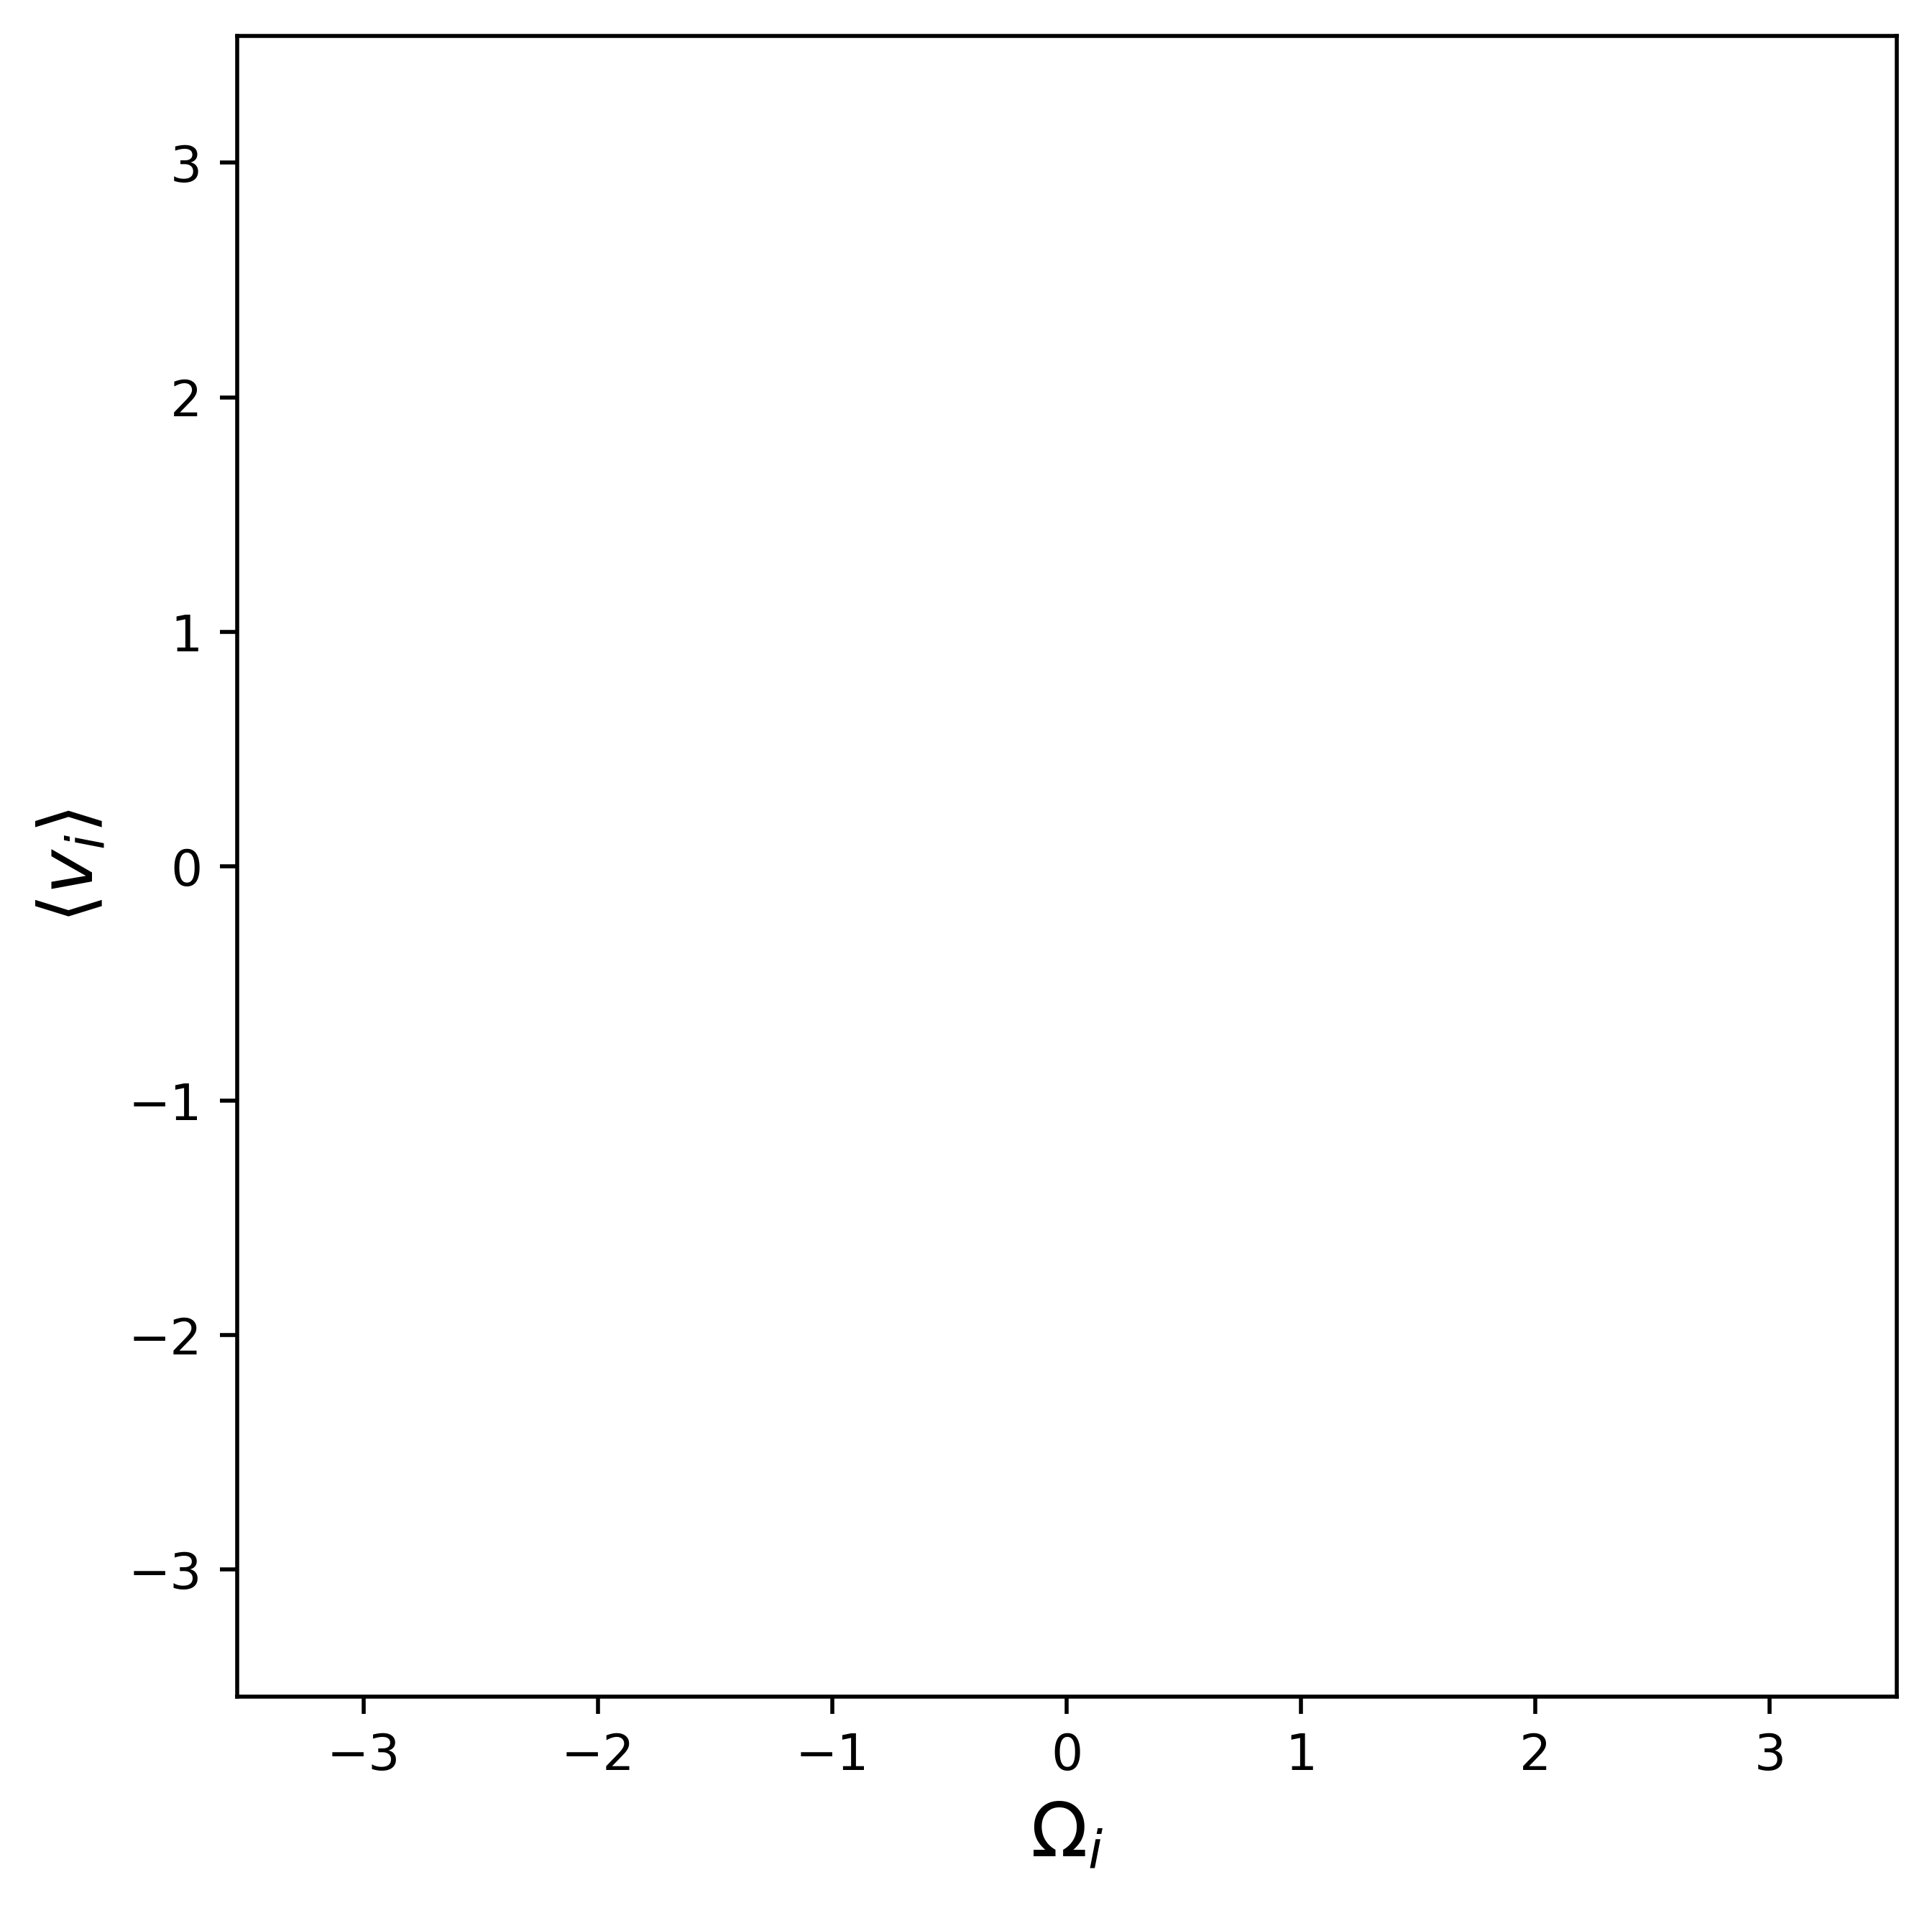

In [576]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(8,6),dpi=500)
ax.set_xlim(omega.min(), omega.max())
ax.set_ylim(np.min(avg_dtheta), np.max(avg_dtheta))
ax.set_xlabel(r'$\Omega_i$',fontsize=15)
ax.set_ylabel(r'$\langle v_i \rangle$',fontsize=15)
ax.set_aspect('equal')
vlines = []
line, = ax.plot([], [], lw=1,zorder=10)
title = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=13)

def init():
    line.set_data([], [])
    for v in vlines:
        v.remove()
    vlines.clear()
    title.set_text('')
    return [line, title] + vlines

def animate(idx):
    for v in vlines:
        v.remove()
    vlines.clear()
    vlines.append(ax.axvline(OPS[idx],color='k'))
    vlines.append(ax.axvline(-OPS[idx],color='k'))
    vlines.append(ax.axvline(OPS[idx]+dps[idx],color='r'))
    vlines.append(ax.axhline(OPS[idx]+dps[idx],color='r'))
    vlines.append(ax.axhline(2*(OPS[idx]+dps[idx]),color='pink'))
    vlines.append(ax.axhline(4/3*(OPS[idx]+dps[idx]),color='lightblue'))
    vlines.append(ax.axhline(-4/3*(OPS[idx]+dps[idx]),color='lightblue'))
    vlines.append(ax.axhline(1.5*(OPS[idx]+dps[idx]),color='lightgrey'))
    vlines.append(ax.axhline(-1.5*(OPS[idx]+dps[idx]),color='lightgrey'))
    vlines.append(ax.axvline(-(OPS[idx]+dps[idx]),color='r'))
    vlines.append(ax.axhline(-(OPS[idx]+dps[idx]),color='r'))
    vlines.append(ax.axhline(-2*(OPS[idx]+dps[idx]),color='pink'))
    vlines.append(ax.axvline(OPS[idx]+dps[idx]+opp[idx],color='b'))
    vlines.append(ax.axvline(-(OPS[idx]+dps[idx]+opp[idx]),color='b'))
    vlines.append(ax.axvline(OPS[idx]+dps[idx]-opp[idx],color='b'))
    vlines.append(ax.axvline(-(OPS[idx]+dps[idx]-opp[idx]),color='b'))
    title.set_text(rf'$t={t[idx]},R={r_s[idx]:.02f},R_0={r0_s[idx]:.02f},r_+={rp_s[idx]:.02f},r_-={rm_s[idx]:.02f}$')
    line.set_data(omega, avg_dtheta[idx])
    return [line, title] + vlines

ani = animation.FuncAnimation(fig, animate, frames=range(0, len(t)-s_lang, 100), init_func=init, blit=False, interval=100)

In [577]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [526]:
opp = 4/np.pi * np.sqrt(K*rp_/m) - 0.3056/np.sqrt(K*rp_*m**3)


In [527]:
import sympy as sp
K_,m_,x,s = sp.symbols('K m x s',real=True,positive=True)
f = 4/sp.pi * sp.sqrt(K_/m_)*sp.sqrt(x) - s/sp.sqrt(K_*m_**3)/sp.sqrt(x)
(f**2*m_**2).expand().simplify()

16*K*m*x/pi**2 - 8*s/pi + s**2/(K*m*x)

In [140]:
S = 0.3056